Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps: 

a. Import the necessary packages

b. Load the training and testing data 

c. Define the network architecture using Keras 

d. Train the model using SGD with 11 epochs

e. Evaluate the network  

f. Plot the training loss and accuracy

# With MNIST as CSV

In [1]:
import pandas as pd
import numpy as np

In [3]:
# get train and test csvs
mnist_train = pd.read_csv(r'./content/mnist_train.csv')
mnist_test  = pd.read_csv(r'./content/mnist_test.csv')

In [4]:
# check shape of loaded datasets
print('Shape of Train = ', mnist_train.shape)
print('Shape of Test = ', mnist_test.shape)

Shape of Train =  (60000, 785)
Shape of Test =  (10000, 785)


In [5]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [12]:
mnist_train.iloc[:,1:]

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [14]:
x_train = mnist_train.iloc[:,1:]
y_train = mnist_train['label']

In [15]:
print(type(x_train))
x_train.shape

<class 'pandas.core.frame.DataFrame'>


(60000, 784)

In [16]:
x_train = pd.DataFrame.to_numpy(x_train)
y_train = pd.DataFrame.to_numpy(y_train)
print(type(x_train))
x_train.shape

<class 'numpy.ndarray'>


(60000, 784)

In [17]:
mnist_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_test = mnist_test.iloc[:,1:]
y_test = mnist_test['label']

In [19]:
x_test = pd.DataFrame.to_numpy(x_test)
y_test = pd.DataFrame.to_numpy(y_test)

In [20]:
# check shape of loaded datasets
print('Shape of Train = {0} and {1}'.format(x_train.shape, y_train.shape))
print('Shape of Test = {0} and {1}'.format(x_test.shape, y_test.shape))

Shape of Train = (60000, 784) and (60000,)
Shape of Test = (10000, 784) and (10000,)


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [23]:
lb = LabelBinarizer()
lby_train = lb.+fit_transform(y_train)
lby_test = lb.'transform(y_test)

In [25]:
lby_train.shape

(60000, 10)

In [26]:
lby_test.shape

(10000, 10)

In [30]:
epochs = 4
num_classes = 10
optim = SGD()

In [31]:
model = Sequential()
model.add(Dense(784, activation='sigmoid'))
model.add(Dense(392, activation='sigmoid'))
model.add(Dense(196, activation='sigmoid'))
model.add(Dense(92, activation='sigmoid'))
model.add(Dense(46, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [32]:
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
h = model.fit(x=x_train, y=lby_train, epochs=epochs, validation_data=(x_test, lby_test))

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1139 - val_loss: 2.2982 - val_accuracy: 0.1028
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2950 - accuracy: 0.1308 - val_loss: 2.2915 - val_accuracy: 0.1135
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2860 - accuracy: 0.1535 - val_loss: 2.2765 - val_accuracy: 0.1242
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2574 - accuracy: 0.2216 - val_loss: 2.2150 - val_accuracy: 0.2000


Text(0.5, 1.0, 'Training/Validation Loss vs Epochs')

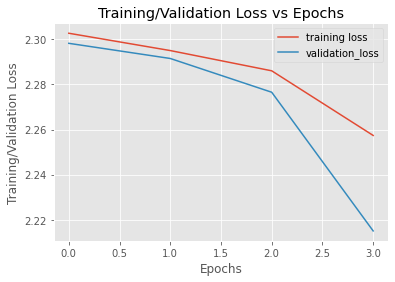

In [34]:
plt.style.use('ggplot')
plt.plot(np.arange(0, epochs), h.history['loss'], label='training loss')
plt.plot(np.arange(0, epochs), h.history['val_loss'], label='validation_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Loss")
plt.title('Training/Validation Loss vs Epochs')

Text(0.5, 1.0, 'Training/Validation Accuracy vs Epochs')

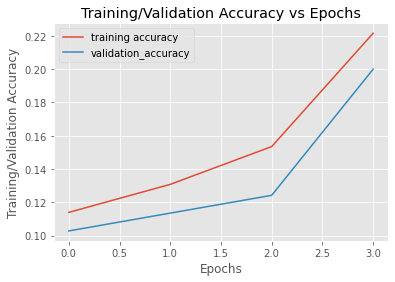

In [35]:
plt.style.use('ggplot')
plt.plot(np.arange(0, epochs), h.history['accuracy'], label='training accuracy')
plt.plot(np.arange(0, epochs), h.history['val_accuracy'], label='validation_accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Accuracy")
plt.title('Training/Validation Accuracy vs Epochs')

In [36]:
predictions = model.predict(x_test)
predictions.shape

313/313 [==============================] - 1s 1ms/step


(10000, 10)

In [37]:
y_test.shape

(10000,)

In [38]:
lby_test.shape

(10000, 10)

In [40]:
print(classification_report(np.argmax(lby_test, axis=1), np.argmax(predictions, axis=1), labels=lb.classes_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.24      1.00      0.39      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       1.00      0.01      0.01       958
           7       0.16      0.84      0.27      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.20     10000
   macro avg       0.14      0.18      0.07     10000
weighted avg       0.14      0.20      0.07     10000



In [41]:
np.argmax(lby_test, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)